# Data processing

## Download packages for work

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from collections import OrderedDict

## Download data

In [2]:
df = pd.read_csv('C://Users/Александр/Downloads/ga_hits.csv')
df1 = pd.read_csv('C://Users/Александр/Downloads/ga_sessions.csv')

C:\Users\Александр\AppData\Local\Temp\ipykernel_15404\4013387780.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('C://Users/Александр/Downloads/ga_sessions.csv')


## Initial assessment and data transformation

In [3]:
df

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,810589.0,43,event,NaN,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,NaN,NaN
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,904927.0,40,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,NaN,NaN
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,2172865.0,43,event,NaN,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,NaN,NaN
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,713325.0,45,event,NaN,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,NaN,NaN


In [4]:
df1

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,NaN,NaN,1920x1080,Chrome,Russia,Moscow
1860038,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,390x844,Safari,Russia,Stavropol
1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow
1860040,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk


Business Understanding. There are two datasets, df and df1. The df dataset (dimension 15,726,470 rows × 11 columns) is an array of data describing user actions when visiting the SberAutoSubscription website. Each action (following a link, pressing a button, etc.) corresponds to one line. Each visit to the site (session_id) can correspond to several (up to several hundred) lines. Useful information, in accordance with the conditions of the task, is contained in the columns 'session_id' (unique number of the visit to the site), 'hit_page_path' (the http address to which the transition is made during the described action), 'event_action' (action type, divided into target and off-target).
    The df1 dataset (dimension 1,860,042 rows × 18 columns) is an array of data describing the data received upon a user's visit to the SberAutoSubscription website. Each visit corresponds to one line. Useful information, in accordance with the conditions of the task, is contained in the columns 'session_id' (unique visit number to the site), 'visit_date' (date of the site visit), 'utm_source', 'utm_medium', 'utm_campaign' (data from which resource, advertising company went to the SberAutoSubscription page), 'device_category', 'device_brand' (data about the user's device), 'geo_city' (user location).

Check dublicates

In [5]:
df[df.duplicated()]

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value


In [6]:
df1[df1.duplicated()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city


Delete unusuable columns

In [7]:
df1 = df1.drop(['geo_country', 'utm_adcontent', 'utm_keyword', 'device_os', 'client_id', 'visit_time',
                'device_model', 'device_screen_resolution', 'device_browser', 'visit_number'], axis=1)
df = df.drop(['hit_date', 'hit_time', 'hit_number', 'hit_type', 'hit_referer', 'event_category',
              'event_label', 'event_value'], axis=1)

In [8]:
df

,session_id,hit_page_path,event_action
0,5639623078712724064.1640254056.1640254056,sberauto.com/cars?utm_source_initial=google&ut...,quiz_show
1,7750352294969115059.1640271109.1640271109,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz_show
2,885342191847998240.1640235807.1640235807,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz_show
3,142526202120934167.1640211014.1640211014,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz_show
4,3450086108837475701.1640265078.1640265078,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz_show
...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz_show
15726466,7310304587364460692.1640261783.1640261783,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz_show
15726467,8013702685784312179.1640270195.1640270195,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz_show
15726468,8021505554734405918.1640257821.1640257821,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz_show


In [9]:
df1

,session_id,visit_date,utm_source,utm_medium,utm_campaign,device_category,device_brand,geo_city
0,9055434745589932991.1637753792.1637753792,2021-11-24,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Zlatoust
1,905544597018549464.1636867290.1636867290,2021-11-14,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Samsung,Moscow
2,9055446045651783499.1640648526.1640648526,2021-12-28,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2021-05-29,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Xiaomi,Moscow
4,9055447046360770272.1622255345.1622255345,2021-05-29,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Xiaomi,Moscow
...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2021-12-22,BHcvLfOaCWvWTykYqHVe,cpc,NaN,desktop,NaN,Moscow
1860038,9055421130527858185.1622007305.1622007305,2021-05-26,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,mobile,Apple,Stavropol
1860039,9055422955903931195.1636979515.1636979515,2021-11-15,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,mobile,Apple,Moscow
1860040,905543020766873816.1638189404.1638189404,2021-11-29,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Xiaomi,Chelyabinsk


In [10]:
df_wtf = df.describe()

In [11]:
for _ in df_wtf.columns.tolist():
    print(f'column {_}; amount notna {df_wtf.loc["count", _]}; amount notna in percent {df_wtf.loc["count", _]/len(df.session_id)*100}')

column session_id; amount notna 15726470; amount notna in percent 100.0
column hit_page_path; amount notna 15726470; amount notna in percent 100.0
column event_action; amount notna 15726470; amount notna in percent 100.0


In [12]:
df_wtf1 = df1.describe()

In [13]:
df_wtf1

,session_id,visit_date,utm_source,utm_medium,utm_campaign,device_category,device_brand,geo_city
count,1860042,1860042,1859945,1860042,1640439,1860042,1492864,1860042
unique,1860042,226,293,56,412,3,205,2548
top,9055434745589932991.1637753792.1637753792,2021-05-24,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,mobile,Apple,Moscow
freq,1,39453,578290,552272,463481,1474871,551088,805329


In [14]:
for _ in df_wtf1.columns.tolist():
    print(f'column {_}; amount notna {df_wtf1.loc["count", _]}; amount notna in percent {df_wtf1.loc["count", _]/len(df1.session_id)*100}')

column session_id; amount notna 1860042; amount notna in percent 100.0
column visit_date; amount notna 1860042; amount notna in percent 100.0
column utm_source; amount notna 1859945; amount notna in percent 99.99478506399318
column utm_medium; amount notna 1860042; amount notna in percent 100.0
column utm_campaign; amount notna 1640439; amount notna in percent 88.19365369169083
column device_category; amount notna 1860042; amount notna in percent 100.0
column device_brand; amount notna 1492864; amount notna in percent 80.25969306069433
column geo_city; amount notna 1860042; amount notna in percent 100.0


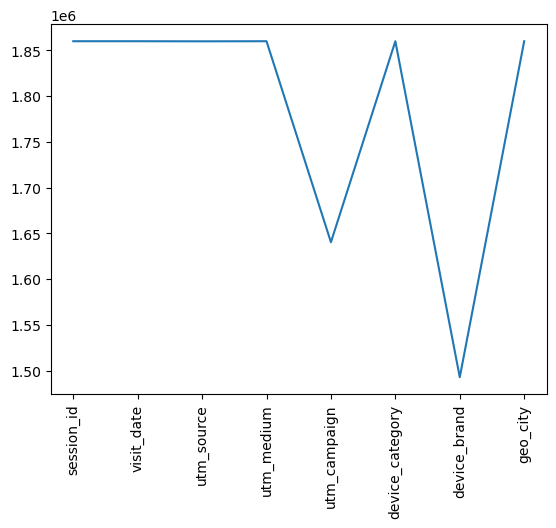

In [15]:
df_wtf1.loc["count",].plot()
plt.xticks(rotation='90')
plt.show()

As you can see, there are missing values ​​in the utm_source, utm_campaign, device_brand df1 columns. We'll deal with them later.

Let's enter a target. To do this, select from the dataframe with user actions, actions related to the target ones, and write down the id of the sessions in which they occurred

In [16]:
df_ta = df[(df['event_action'] == 'sub_car_claim_click') | (df['event_action'] == 'sub_car_claim_submit_click') |
        (df['event_action'] == 'sub_open_dialog_click') | (df['event_action'] == 'sub_custom_question_submit_click') |
        (df['event_action'] == 'sub_call_number_click') | (df['event_action'] == 'sub_callback_submit_click') |
        (df['event_action'] == 'sub_submit_success') | (df['event_action'] == 'sub_car_request_submit_click')]

Write uniqal id sessions in apart dataframe

In [17]:
df_uniq_id = df_ta.session_id.value_counts().to_frame(name='target_action')

In [18]:
df_uniq_id

,target_action
7140505447604038223.1630415440.1630415440,474
2375944964542858067.1635025747.1635025747,83
4245963133837464050.1640882501.1640882501,81
9126246154865944745.1636772009.1636772009,74
8112688049712084307.1621439828.1621439828,73
...,...
1314413006702746508.1621859212.1621859212,1
3455201109925940924.1621872317.1621872317,1
274123450315663179.1621845837.1621845837,1
5356684188150624787.1621848595.1621848595,1


Let's connect frame df1 with data about visits to the site, with a frame with the number of target actions, by common columns containing session_id

In [19]:
df_res = pd.merge(df1, df_uniq_id, how='outer', left_on='session_id', right_index=True)
df_res

,session_id,visit_date,utm_source,utm_medium,utm_campaign,device_category,device_brand,geo_city,target_action
0.0,9055434745589932991.1637753792.1637753792,2021-11-24,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Zlatoust,NaN
1.0,905544597018549464.1636867290.1636867290,2021-11-14,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Samsung,Moscow,NaN
2.0,9055446045651783499.1640648526.1640648526,2021-12-28,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Krasnoyarsk,NaN
3.0,9055447046360770272.1622255328.1622255328,2021-05-29,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Xiaomi,Moscow,NaN
4.0,9055447046360770272.1622255345.1622255345,2021-05-29,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Xiaomi,Moscow,NaN
...,...,...,...,...,...,...,...,...,...
NaN,2687358779593959934.1639557646.1639557646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
NaN,2363418164141671301.1639122124.1639122124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
NaN,4284576603515722110.1635865504.1635865663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
NaN,1187487192585096450.1639387310.1639387310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


There were 446 visits in the dataframe indicating the target actions, data about which (with such session_id) is not in the dataframe with data on visits to the site. Since these records do not carry any useful information, and their number is small (less than 1 percent of the total number of 50,760 rows), we remove them from the general dataset. We also fill in the NaN values ​​in the target_action column, in the rows for which there were no target actions, with the value 0

In [20]:
df_res = df_res.dropna(subset=['visit_date'])
df_res['target_action'].fillna(0, inplace=True)

C:\Users\Александр\AppData\Local\Temp\ipykernel_15404\2087490285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['target_action'].fillna(0, inplace=True)


In [21]:
df_res

,session_id,visit_date,utm_source,utm_medium,utm_campaign,device_category,device_brand,geo_city,target_action
0.0,9055434745589932991.1637753792.1637753792,2021-11-24,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Zlatoust,0.0
1.0,905544597018549464.1636867290.1636867290,2021-11-14,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Samsung,Moscow,0.0
2.0,9055446045651783499.1640648526.1640648526,2021-12-28,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Krasnoyarsk,0.0
3.0,9055447046360770272.1622255328.1622255328,2021-05-29,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Xiaomi,Moscow,0.0
4.0,9055447046360770272.1622255345.1622255345,2021-05-29,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Xiaomi,Moscow,0.0
...,...,...,...,...,...,...,...,...,...
1860037.0,9055415581448263752.1640159305.1640159305,2021-12-22,BHcvLfOaCWvWTykYqHVe,cpc,NaN,desktop,NaN,Moscow,0.0
1860038.0,9055421130527858185.1622007305.1622007305,2021-05-26,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,mobile,Apple,Stavropol,0.0
1860039.0,9055422955903931195.1636979515.1636979515,2021-11-15,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,mobile,Apple,Moscow,0.0
1860040.0,905543020766873816.1638189404.1638189404,2021-11-29,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Xiaomi,Chelyabinsk,0.0


It isn't matter for us, how many target actions were on every visit. Replace positive values to 1

In [22]:
df_res.loc[df_res['target_action'] >= 1, 'target_action'] = 1

In [23]:
df_res['target_action'].value_counts()

0.0    1809728
1.0      50314
Name: target_action, dtype: int64

Change types of data 

In [24]:
df_res.dtypes

session_id          object
visit_date          object
utm_source          object
utm_medium          object
utm_campaign        object
device_category     object
device_brand        object
geo_city            object
target_action      float64
dtype: object

In [25]:
df_res['visit_date'] = pd.to_datetime(df_res['visit_date'], utc=True)

C:\Users\Александр\AppData\Local\Temp\ipykernel_15404\913651564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['visit_date'] = pd.to_datetime(df_res['visit_date'], utc=True)


In [26]:
df_res['target_action'] = df_res['target_action'].astype('int64')
df_res.dtypes

C:\Users\Александр\AppData\Local\Temp\ipykernel_15404\1556122007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['target_action'] = df_res['target_action'].astype('int64')


session_id                      object
visit_date         datetime64[ns, UTC]
utm_source                      object
utm_medium                      object
utm_campaign                    object
device_category                 object
device_brand                    object
geo_city                        object
target_action                    int64
dtype: object

In [27]:
df_res['visit_date'].value_counts()

2021-05-24 00:00:00+00:00    39453
2021-12-21 00:00:00+00:00    30704
2021-05-25 00:00:00+00:00    19305
2021-06-29 00:00:00+00:00    17367
2021-09-14 00:00:00+00:00    16204
                             ...  
2021-06-05 00:00:00+00:00     2102
2021-05-23 00:00:00+00:00     1246
2021-05-21 00:00:00+00:00     1110
2021-05-22 00:00:00+00:00      986
2021-05-19 00:00:00+00:00      877
Name: visit_date, Length: 226, dtype: int64

In [28]:
df_time = df_res.groupby('visit_date').count()

In [29]:
df_time_ta = df_res[df_res['target_action'] == 1].groupby('visit_date').count()
df_time_ta.tail(15)

,session_id,utm_source,utm_medium,utm_campaign,device_category,device_brand,geo_city,target_action
visit_date,,,,,,,,
2021-12-17 00:00:00+00:00,256,256,256,211,256,226,256,256
2021-12-18 00:00:00+00:00,225,225,225,180,225,209,225,225
2021-12-19 00:00:00+00:00,238,238,238,201,238,218,238,238
2021-12-20 00:00:00+00:00,225,225,225,172,225,195,225,225
2021-12-21 00:00:00+00:00,759,759,759,706,759,735,759,759
2021-12-22 00:00:00+00:00,296,296,296,251,296,271,296,296
2021-12-23 00:00:00+00:00,255,255,255,201,255,210,255,255
2021-12-24 00:00:00+00:00,249,249,249,206,249,222,249,249
2021-12-25 00:00:00+00:00,232,232,232,183,232,219,232,232


In [30]:
df_time

,session_id,utm_source,utm_medium,utm_campaign,device_category,device_brand,geo_city,target_action
visit_date,,,,,,,,
2021-05-19 00:00:00+00:00,877,877,877,877,877,369,877,877
2021-05-21 00:00:00+00:00,1110,1110,1110,1062,1110,522,1110,1110
2021-05-22 00:00:00+00:00,986,986,986,873,986,682,986,986
2021-05-23 00:00:00+00:00,1246,1246,1246,1079,1246,877,1246,1246
2021-05-24 00:00:00+00:00,39453,39453,39453,39319,39453,24020,39453,39453
...,...,...,...,...,...,...,...,...
2021-12-27 00:00:00+00:00,11910,11909,11910,10804,11910,10266,11910,11910
2021-12-28 00:00:00+00:00,12544,12544,12544,11528,12544,10931,12544,12544
2021-12-29 00:00:00+00:00,13057,13053,13057,12178,13057,11343,13057,13057


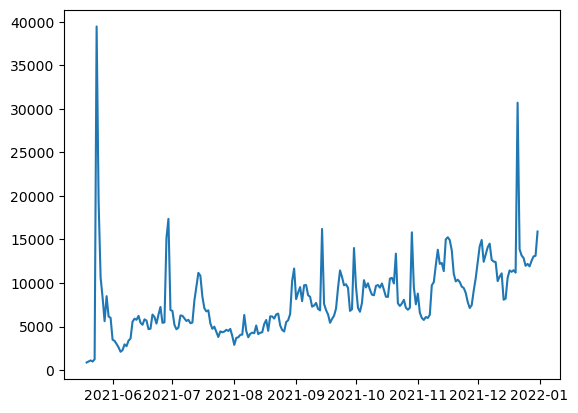

In [31]:
plt.plot(df_time.index, df_time.session_id)

A gradual increase in traffic is noticeable, several peaks are also pronounced - the results of campaigns to attract users

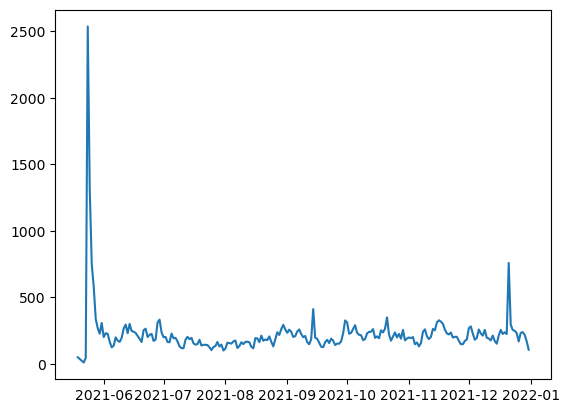

In [32]:
plt.plot(df_time_ta.index, df_time_ta.session_id)

The stagnation of the level of target actions with a negative forecast is visible. The peak stands out on May 24, the most successful company in attracting targeted traffic, as well as on December 21, which is much less successful. Let's analyze, which gave a significant influx of the chart

In [33]:
df_for_analize1 = df_res[(df_res['target_action'] == 1) & (df_res['visit_date'].isin(['2021-05-24 00:00:00+00:00']))]
df_for_analize2 = df_res[(df_res['target_action'] == 1) & (df_res['visit_date'].isin(['2021-12-21 00:00:00+00:00']))]

In [34]:
df_for_analize1.utm_source.value_counts()

fDLlAcSmythWSCVMvqvL    1598
bByPQxmDaMXgpHeypKSM     479
kjsLglQLzykiRbcDiGcD     162
aXQzDWsJuGXeBXexNHjc     146
oZCzWSykfixnjMPDNjSU      45
BHcvLfOaCWvWTykYqHVe      35
DnEUulZAecfGPvdtZBYS      29
BKeImrJuRDZcHiSSTdzm      14
jaSOmLICuBzCFqHfBdRg       6
ZHCJROlbqnkXTqIuVxnm       4
qVXuCoVQtPxcUkAXiXBa       3
KgicpPxiEQfzPlPwQZJq       3
NTQAiqAhSTbkRRmxVKoQ       3
NwuIyBhuPCXhJVPLtXCC       2
ZpYIoDJMcFzVoPFsHGJL       2
fcXWTQaKfxbkBkBnzLhK       1
oSQBbhIkNionRJpNbQfT       1
GWZGdHKPgmZPNPwkJshU       1
bxOTvPtyGSdUrbwoXCPO       1
TTtiRKFZIaQpIWggfCoF       1
Name: utm_source, dtype: int64

In [35]:
df_for_analize2.utm_source.value_counts()

ZpYIoDJMcFzVoPFsHGJL    647
QxAxdyPLuQMEcrdZWdWb     30
kjsLglQLzykiRbcDiGcD     20
fDLlAcSmythWSCVMvqvL     17
BHcvLfOaCWvWTykYqHVe     15
MvfHsxITijuriZxsqZqt     12
bByPQxmDaMXgpHeypKSM     10
oZCzWSykfixnjMPDNjSU      2
XiUifkjKLLnomcDRhswp      1
aXQzDWsJuGXeBXexNHjc      1
nSReTmyFtbSjlPrTKoaX      1
azajeHUvPOKkHBvWFbjz      1
vFcAhRxLfOWKhvxjELkx      1
GpAkIXsclxDGyILfNlrR      1
Name: utm_source, dtype: int64

Thus, the most successful company in attracting targeted traffic was from the fDLlAcSmythWSCVMvqvL resource. Perhaps there is a need for reuse, cost comparison, etc.

#  Organic traffic is no different from paid traffic in terms of CR

## Check hipothesis

Separate data into organic and non-organic traffic

In [38]:
df_org = df_res[(df_res['utm_medium'] == 'organic') |  (df_res['utm_medium'] == 'referral') |
                (df_res['utm_medium'] == '(none)')]

In [39]:
df_norg = df_res[~df_res.index.isin(df_org.index)]

Check the distribution of target actions

<AxesSubplot:>

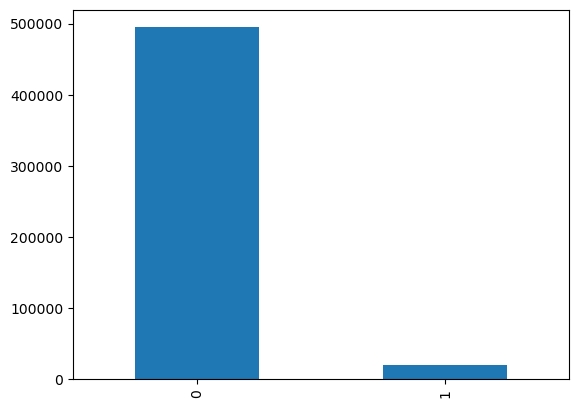

In [41]:
df_org['target_action'].value_counts().plot.bar()

In [42]:
df00 = df_res.target_action.value_counts().to_frame(name='count_target_action')
df00['target_action'] = ["Weren't", "Were"]

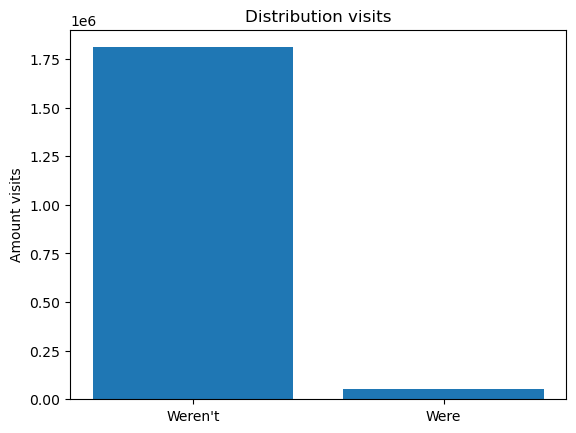

In [43]:
x = df00.target_action
y = df00.count_target_action

plt.bar(x, y)
plt.ylabel('Amount visits')
plt.title('Distribution visits')
plt.show()

In [44]:
df_res.target_action.value_counts()

0    1809728
1      50314
Name: target_action, dtype: int64

In [45]:
df_norg

,session_id,visit_date,utm_source,utm_medium,utm_campaign,device_category,device_brand,geo_city,target_action
0.0,9055434745589932991.1637753792.1637753792,2021-11-24 00:00:00+00:00,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Zlatoust,0
1.0,905544597018549464.1636867290.1636867290,2021-11-14 00:00:00+00:00,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Samsung,Moscow,0
2.0,9055446045651783499.1640648526.1640648526,2021-12-28 00:00:00+00:00,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Krasnoyarsk,0
3.0,9055447046360770272.1622255328.1622255328,2021-05-29 00:00:00+00:00,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Xiaomi,Moscow,0
4.0,9055447046360770272.1622255345.1622255345,2021-05-29 00:00:00+00:00,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Xiaomi,Moscow,0
...,...,...,...,...,...,...,...,...,...
1860035.0,9055398929844789828.1624891784.1624891784,2021-06-28 00:00:00+00:00,kjsLglQLzykiRbcDiGcD,cpc,vXsFkagGabkcWKlgLzSg,mobile,Samsung,Naro-Fominsk,0
1860036.0,9055401700113249881.1639446112.1639446112,2021-12-14 00:00:00+00:00,ZpYIoDJMcFzVoPFsHGJL,banner,TmThBvoCcwkCZZUWACYq,mobile,ZTE,Blagoveshchensk,0
1860037.0,9055415581448263752.1640159305.1640159305,2021-12-22 00:00:00+00:00,BHcvLfOaCWvWTykYqHVe,cpc,NaN,desktop,NaN,Moscow,0
1860040.0,905543020766873816.1638189404.1638189404,2021-11-29 00:00:00+00:00,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Xiaomi,Chelyabinsk,0


In [46]:
df_org

,session_id,visit_date,utm_source,utm_medium,utm_campaign,device_category,device_brand,geo_city,target_action
5.0,9055447192389856083.1622453074.1622453074,2021-05-31 00:00:00+00:00,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,mobile,Apple,Saint Petersburg,0
11.0,9055469620715506713.1628883994.1628883994,2021-08-13 00:00:00+00:00,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,mobile,Samsung,Saint Petersburg,0
12.0,9055469620715506713.1633110583.1633110583,2021-10-01 00:00:00+00:00,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,mobile,Samsung,Saint Petersburg,0
13.0,9055469620715506713.1635878177.1635878177,2021-11-02 00:00:00+00:00,gVRrcxiDQubJiljoTbGm,referral,LTuZkdKfxRGVceoWkVyg,mobile,Samsung,Sochi,0
28.0,9055505230298952295.1638478433.1638478433,2021-12-02 00:00:00+00:00,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,desktop,NaN,Balashikha,0
...,...,...,...,...,...,...,...,...,...
1860026.0,9055355469082180480.1636350848.1636350848,2021-11-08 00:00:00+00:00,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,mobile,Xiaomi,Moscow,0
1860029.0,9055376699099939975.1630766214.1630766214,2021-09-04 00:00:00+00:00,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,desktop,NaN,Khimki,1
1860032.0,9055394269810294140.1629912447.1629912447,2021-08-25 00:00:00+00:00,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,mobile,Samsung,Saint Petersburg,1
1860038.0,9055421130527858185.1622007305.1622007305,2021-05-26 00:00:00+00:00,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,mobile,Apple,Stavropol,0


In [47]:
df_org['target_action'].value_counts()

0    494847
1     20812
Name: target_action, dtype: int64

In [48]:
df_norg['target_action'].value_counts()

0    1314881
1      29502
Name: target_action, dtype: int64

The samples are independent (session_id are distributed among the samples, do not intersect), the distribution is not normal (the distribution into ones and zeros is extremely uneven), we apply the Mann-Whitney test

Null hypothesis - conversion into a target action does not differ between organic traffic (df_org) and paid (df_norg), alternative - it differs

In [49]:
from scipy import stats

In [50]:
stats.mannwhitneyu(df_org.target_action, df_norg.target_action)

MannwhitneyuResult(statistic=353004760287.5, pvalue=0.0)

Pi-value is zero, we accept the alternative hypothesis. Let's check the alternative hypothesis - the conversion to the target action is higher for paid traffic

In [51]:
stats.mannwhitneyu(df_org.target_action, df_norg.target_action, alternative='less')

MannwhitneyuResult(statistic=353004760287.5, pvalue=1.0)

Pi-value is equal to one, we cannot accept the alternative hypothesis. Let's test an alternative hypothesis - conversion into a target action is more for organic traffic

In [52]:
stats.mannwhitneyu(df_org.target_action, df_norg.target_action, alternative='greater')

MannwhitneyuResult(statistic=353004760287.5, pvalue=0.0)

We accept an alternative hypothesis - conversion into a target action is more for organic traffic

# Mobile traffic is no different from decktop traffic in terms of CR

## Check hipothesis

Separete data

In [53]:
df_res.device_category.value_counts()

mobile     1474871
desktop     366863
tablet       18308
Name: device_category, dtype: int64

In [54]:
df_mob = df_res[(df_res['device_category'] == 'mobile') | (df_res['device_category'] == 'tablet')]

In [55]:
df_desc = df_res[(df_res['device_category'] == 'desktop')]

In [56]:
df_mob

,session_id,visit_date,utm_source,utm_medium,utm_campaign,device_category,device_brand,geo_city,target_action
0.0,9055434745589932991.1637753792.1637753792,2021-11-24 00:00:00+00:00,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Zlatoust,0
1.0,905544597018549464.1636867290.1636867290,2021-11-14 00:00:00+00:00,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Samsung,Moscow,0
2.0,9055446045651783499.1640648526.1640648526,2021-12-28 00:00:00+00:00,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Krasnoyarsk,0
3.0,9055447046360770272.1622255328.1622255328,2021-05-29 00:00:00+00:00,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Xiaomi,Moscow,0
4.0,9055447046360770272.1622255345.1622255345,2021-05-29 00:00:00+00:00,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Xiaomi,Moscow,0
...,...,...,...,...,...,...,...,...,...
1860035.0,9055398929844789828.1624891784.1624891784,2021-06-28 00:00:00+00:00,kjsLglQLzykiRbcDiGcD,cpc,vXsFkagGabkcWKlgLzSg,mobile,Samsung,Naro-Fominsk,0
1860036.0,9055401700113249881.1639446112.1639446112,2021-12-14 00:00:00+00:00,ZpYIoDJMcFzVoPFsHGJL,banner,TmThBvoCcwkCZZUWACYq,mobile,ZTE,Blagoveshchensk,0
1860038.0,9055421130527858185.1622007305.1622007305,2021-05-26 00:00:00+00:00,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,mobile,Apple,Stavropol,0
1860039.0,9055422955903931195.1636979515.1636979515,2021-11-15 00:00:00+00:00,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,mobile,Apple,Moscow,0


In [57]:
df_desc

,session_id,visit_date,utm_source,utm_medium,utm_campaign,device_category,device_brand,geo_city,target_action
28.0,9055505230298952295.1638478433.1638478433,2021-12-02 00:00:00+00:00,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,desktop,NaN,Balashikha,0
63.0,9055657327967035032.1629707931.1629707931,2021-08-23 00:00:00+00:00,nSReTmyFtbSjlPrTKoaX,banner,BVKxkCOHKUOvkpbrLMgZ,desktop,NaN,Moscow,0
64.0,905565977351442956.1622561294.1622561294,2021-06-01 00:00:00+00:00,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,desktop,NaN,Moscow,0
67.0,9055678214400253418.1636965866.1636965866,2021-11-15 00:00:00+00:00,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,desktop,NaN,Saint Petersburg,0
73.0,9055788191321875859.1626006934.1626006934,2021-07-11 00:00:00+00:00,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,desktop,NaN,Moscow,0
...,...,...,...,...,...,...,...,...,...
1860025.0,9055354507009984602.1636829278.1636829278,2021-11-13 00:00:00+00:00,vFcAhRxLfOWKhvxjELkx,organic,okTXSMadDkjvntEHzIjp,desktop,NaN,Balashikha,0
1860027.0,9055363711117247375.1629176721.1629176721,2021-08-17 00:00:00+00:00,PlbkrSYoHuZBWfYjYnfw,cpm,FTjNLDyTrXaWYgZymFkV,desktop,NaN,(not set),0
1860029.0,9055376699099939975.1630766214.1630766214,2021-09-04 00:00:00+00:00,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,desktop,NaN,Khimki,1
1860037.0,9055415581448263752.1640159305.1640159305,2021-12-22 00:00:00+00:00,BHcvLfOaCWvWTykYqHVe,cpc,NaN,desktop,NaN,Moscow,0


In [58]:
df_mob['target_action'].value_counts()

0    1454378
1      38801
Name: target_action, dtype: int64

In [59]:
df_desc['target_action'].value_counts()

0    355350
1     11513
Name: target_action, dtype: int64

The samples are independent (device_category are distributed among the samples, do not overlap), the distribution is not normal (the distribution into ones and zeros is extremely uneven), we apply the Mann-Whitney test

Null hypothesis - conversion into a target action does not differ between traffic from mobile devices (df_mob) and desktop (df_desc), alternative - it differs

In [60]:
stats.mannwhitneyu(df_mob.target_action, df_desc.target_action)

MannwhitneyuResult(statistic=272417904456.5, pvalue=7.448734524701602e-73)

Pi-value is extremely small, we accept an alternative hypothesis. Let's test an alternative hypothesis - conversion into a target action is more for traffic from desktop devices

In [61]:
stats.mannwhitneyu(df_mob.target_action, df_desc.target_action, alternative='less')

MannwhitneyuResult(statistic=272417904456.5, pvalue=3.724367262350801e-73)

We accept alternative hipothesis, conversion into a target actions is more for traffic from decktop devices

# Traffic from regions of presence does not differ from other traffic in terms of CR

## Check hipothesis

Separate data

In [62]:
with pd.option_context('display.max_rows', None):
    print(df_res['geo_city'].value_counts(dropna=False))

Moscow                                 805329
Saint Petersburg                       296788
(not set)                               78172
Yekaterinburg                           35788
Krasnodar                               32243
Kazan                                   29531
Samara                                  24992
Nizhny Novgorod                         22227
Ufa                                     21679
Novosibirsk                             21568
Krasnoyarsk                             16346
Chelyabinsk                             15951
Tula                                    15814
Voronezh                                13908
Rostov-on-Don                           13886
Irkutsk                                 13532
Grozny                                  12742
Balashikha                              12679
Vladivostok                             12325
Yaroslavl                                9833
Sochi                                    8972
Tyumen                            

In [63]:
city_list = ('Moscow', 'Saint Petersburg', 'Balashikha', 'Khimki', 'Vidnoye', 'Odintsovo', 'Mytishchi', 'Zheleznodorozhny',
             'Korolyov', 'Domodedovo', 'Podolsk', 'Krasnogorsk', 'Dolgoprudny', 'Lyubertsy', 'Reutov', 'Shchyolkovo',
             'Kolomna', 'Lobnya', 'Kotelniki', 'Elektrostal', 'Ramenskoye', 'Sergiyev Posad', 'Zhukovskiy', 'Dmitrov',
             'Obninsk', 'Nakhabino', 'Lytkarino', 'Istra', 'Chekhov', 'Noginsk', 'Dubna', 'Fryazino', 'Klimovsk',
             'Naro-Fominsk', 'Dedovsk', 'Serpukhov', 'Ivanteyevka', 'Klin', 'Dzerzhinsky', 'Pavlovsky Posad', 'Zvenigorod',
             'Stupino', 'Malakhovka', 'Kraskovo', 'Voskresensk', 'Orekhovo-Zuyevo', 'Aprelevka', 'Krasnoznamensk', 
             'Novomoskovsk', 'Khotkovo', 'Yegoryevsk', 'Ruza', 'Mozhaysk', 'Kubinka', 'Solnechnogorsk', 'Dzerzhinsk',
             'Chernogolovka', 'Golitsyno', 'Povarovo', 'Losino-Petrovsky', 'Volokolamsk', 'Selyatino', 'Protvino',
             'Krasnoarmeysk', 'Tomilino', 'Staraya Kupavna', 'Monino', 'Kashira', 'Tuchkovo', 'Vyazniki', 'Shatura', 'Gorki-2',
             'Center'
            )

In [64]:
df_msk = df_res.loc[df_res['geo_city'].isin(city_list)]

In [65]:
df_msk

,session_id,visit_date,utm_source,utm_medium,utm_campaign,device_category,device_brand,geo_city,target_action
1.0,905544597018549464.1636867290.1636867290,2021-11-14 00:00:00+00:00,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Samsung,Moscow,0
3.0,9055447046360770272.1622255328.1622255328,2021-05-29 00:00:00+00:00,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Xiaomi,Moscow,0
4.0,9055447046360770272.1622255345.1622255345,2021-05-29 00:00:00+00:00,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Xiaomi,Moscow,0
5.0,9055447192389856083.1622453074.1622453074,2021-05-31 00:00:00+00:00,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,mobile,Apple,Saint Petersburg,0
6.0,9055455318486370642.1640843788.1640843788,2021-12-30 00:00:00+00:00,TxKUcPpthBDPieTGmVhx,cpc,FTjNLDyTrXaWYgZymFkV,tablet,Lenovo,Saint Petersburg,0
...,...,...,...,...,...,...,...,...,...
1860034.0,9055397194683347295.1630237022.1630237022,2021-08-29 00:00:00+00:00,ISrKoXQCxqqYvAZICvjs,blogger_stories,zfwIehuEfWYdYrEZgRLo,mobile,Apple,Zheleznodorozhny,0
1860035.0,9055398929844789828.1624891784.1624891784,2021-06-28 00:00:00+00:00,kjsLglQLzykiRbcDiGcD,cpc,vXsFkagGabkcWKlgLzSg,mobile,Samsung,Naro-Fominsk,0
1860037.0,9055415581448263752.1640159305.1640159305,2021-12-22 00:00:00+00:00,BHcvLfOaCWvWTykYqHVe,cpc,NaN,desktop,NaN,Moscow,0
1860039.0,9055422955903931195.1636979515.1636979515,2021-11-15 00:00:00+00:00,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,mobile,Apple,Moscow,0


In [66]:
df_zamkad = df_res[~df_res.index.isin(df_msk.index)]

In [67]:
df_zamkad.target_action.value_counts()

0    629287
1     16389
Name: target_action, dtype: int64

In [68]:
df_msk.target_action.value_counts()

0    1180441
1      33925
Name: target_action, dtype: int64

The samples are independent (device_category are distributed among the samples, do not overlap), the distribution is not normal (the distribution into ones and zeros is extremely uneven), we apply the Mann-Whitney test

Null hipothesis is convert in target action is no different from traffic from regions presence and other.

In [69]:
stats.mannwhitneyu(df_msk.target_action, df_zamkad.target_action)

MannwhitneyuResult(statistic=393044647671.0, pvalue=1.6097572434072445e-24)

Pi-value is extremally small, we accept alternative hipothesis.

In [70]:
stats.mannwhitneyu(df_msk.target_action, df_zamkad.target_action, alternative='greater')

MannwhitneyuResult(statistic=393044647671.0, pvalue=8.048786217036223e-25)

We accept an alternative hypothesis - the conversion into a target action is more for traffic from the regions of presence

# From what sources / campaigns / devices / locations does the most targeted traffic come to us (both in terms of traffic volume and in terms of CR)?

From what sources

In [71]:
df11 = df_res.utm_source.value_counts(dropna=False).head(10)
df11

ZpYIoDJMcFzVoPFsHGJL    578290
fDLlAcSmythWSCVMvqvL    300575
kjsLglQLzykiRbcDiGcD    266354
MvfHsxITijuriZxsqZqt    186199
BHcvLfOaCWvWTykYqHVe    116320
bByPQxmDaMXgpHeypKSM    102287
QxAxdyPLuQMEcrdZWdWb     51415
aXQzDWsJuGXeBXexNHjc     31152
jaSOmLICuBzCFqHfBdRg     29241
RmEBuqrriAfAVsLQQmhk     28055
Name: utm_source, dtype: int64

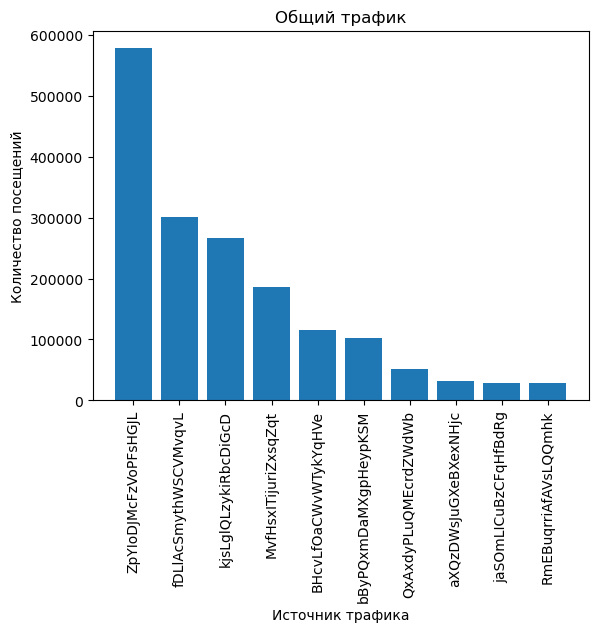

In [72]:
x = df11.index
y = df11

plt.bar(x, y)
plt.xticks(rotation='90')
plt.xlabel('Источник трафика')
plt.ylabel('Количество посещений')
plt.title('Общий трафик')
plt.show()

In [73]:
df12 = df_res[df_res['target_action'] == 1].utm_source.value_counts(dropna=False).head(10)
df12

ZpYIoDJMcFzVoPFsHGJL    15998
fDLlAcSmythWSCVMvqvL    10531
kjsLglQLzykiRbcDiGcD     6293
bByPQxmDaMXgpHeypKSM     5557
BHcvLfOaCWvWTykYqHVe     3882
MvfHsxITijuriZxsqZqt     2249
aXQzDWsJuGXeBXexNHjc     1827
QxAxdyPLuQMEcrdZWdWb     1404
jaSOmLICuBzCFqHfBdRg      401
oZCzWSykfixnjMPDNjSU      260
Name: utm_source, dtype: int64

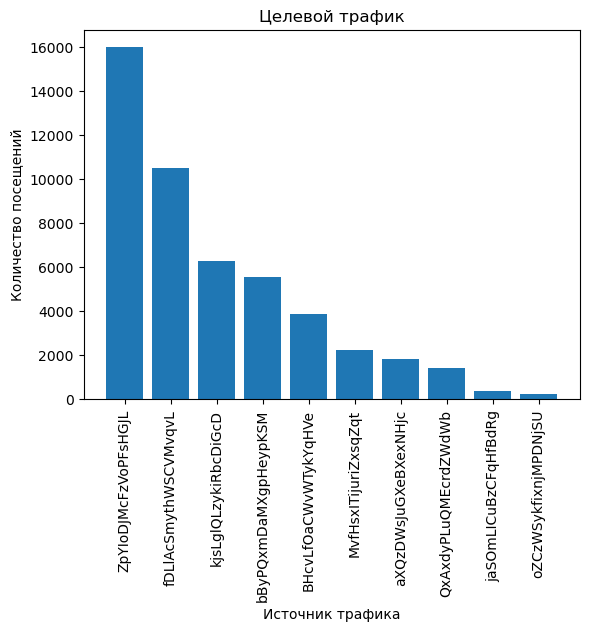

In [74]:
x = df12.index
y = df12

plt.bar(x, y)
plt.xticks(rotation='90')
plt.xlabel('Источник трафика')
plt.ylabel('Количество посещений')
plt.title('Целевой трафик')
plt.show()

From what company

In [75]:
df_res.utm_campaign.value_counts(dropna=False).head(10)

LTuZkdKfxRGVceoWkVyg    463481
LEoPHuyFvzoNfnzGgfcd    324044
FTjNLDyTrXaWYgZymFkV    247360
NaN                     219603
gecBYcKZCPMcVYdSSzKP    134042
TmThBvoCcwkCZZUWACYq     26597
XHNUiSKKGTEpSAlaVMFQ     24524
okTXSMadDkjvntEHzIjp     24511
SgIUDYUKnyWHVowUOqid     22841
sbJRYgVfvcnqKJNDDYIr     20188
Name: utm_campaign, dtype: int64

Since we cannot get utm_campaign data from other sources, we will fill in the missing values ​​on No_campaign

In [76]:
df_res['utm_campaign'] = df_res.utm_campaign.fillna('No_campaign')

C:\Users\Александр\AppData\Local\Temp\ipykernel_15404\2531142731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['utm_campaign'] = df_res.utm_campaign.fillna('No_campaign')


In [77]:
df21 = df_res.utm_campaign.value_counts(dropna=False).head(10)
df21

LTuZkdKfxRGVceoWkVyg    463481
LEoPHuyFvzoNfnzGgfcd    324044
FTjNLDyTrXaWYgZymFkV    247360
No_campaign             219603
gecBYcKZCPMcVYdSSzKP    134042
TmThBvoCcwkCZZUWACYq     26597
XHNUiSKKGTEpSAlaVMFQ     24524
okTXSMadDkjvntEHzIjp     24511
SgIUDYUKnyWHVowUOqid     22841
sbJRYgVfvcnqKJNDDYIr     20188
Name: utm_campaign, dtype: int64

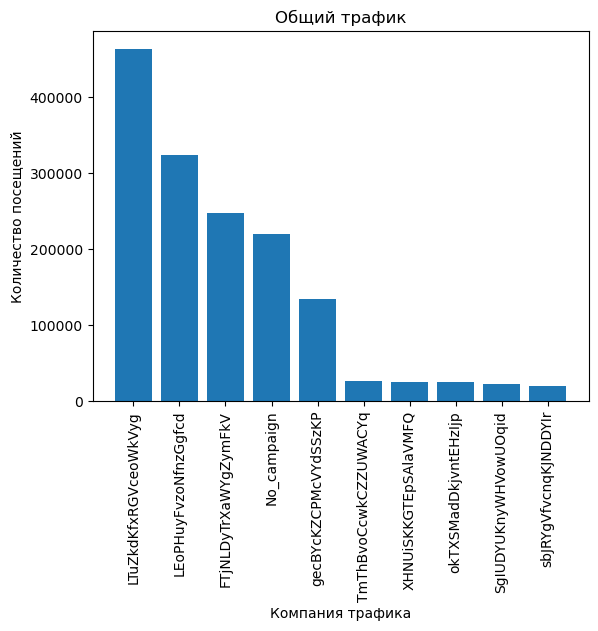

In [78]:
x = df21.index
y = df21

plt.bar(x, y)
plt.xticks(rotation='90')
plt.xlabel('Компания трафика')
plt.ylabel('Количество посещений')
plt.title('Общий трафик')
plt.show()

In [79]:
df22 = df_res[df_res['target_action'] == 1].utm_campaign.value_counts().head(10)
df22

LTuZkdKfxRGVceoWkVyg    19006
LEoPHuyFvzoNfnzGgfcd     9348
No_campaign              7174
gecBYcKZCPMcVYdSSzKP     4545
FTjNLDyTrXaWYgZymFkV     2447
sbJRYgVfvcnqKJNDDYIr      575
XHNUiSKKGTEpSAlaVMFQ      401
SgIUDYUKnyWHVowUOqid      373
LwJZxKuWmvOhPsaCeRjG      285
zxoiLxhuSIFrCeTLQVWZ      270
Name: utm_campaign, dtype: int64

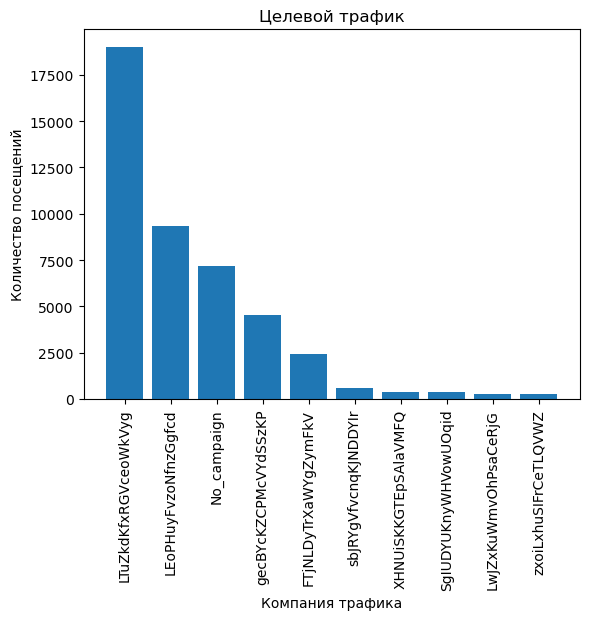

In [80]:
x = df22.index
y = df22

plt.bar(x, y)
plt.xticks(rotation='90')
plt.xlabel('Компания трафика')
plt.ylabel('Количество посещений')
plt.title('Целевой трафик')
plt.show()

From what devices

In [81]:
df_res.device_brand.value_counts(dropna=False)

Apple       551088
NaN         367178
Samsung     332194
Xiaomi      288367
Huawei      185853
             ...  
Vodafone         1
Wexler           1
KingSing         1
Star             1
Opera            1
Name: device_brand, Length: 206, dtype: int64

A significant amount of data is missing, however, we can indicate the adjacent device_category column, the main amount of missing data is visits from desktop devices

In [82]:
df_res.device_brand.fillna(df_res['device_category'], inplace=True)

C:\Users\Александр\AppData\Local\Temp\ipykernel_15404\3989077317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res.device_brand.fillna(df_res['device_category'], inplace=True)


In [83]:
df_res.device_brand.value_counts().head(10)

Apple        551088
desktop      366721
Samsung      332194
Xiaomi       288367
Huawei       185853
Realme        19058
(not set)     17545
OPPO          13504
Vivo          11740
OnePlus        9965
Name: device_brand, dtype: int64

As you can see, there are also a number of unidentified brands. Check what we know about them

In [84]:
df_res[df_res['device_brand'] == '(not set)']

,session_id,visit_date,utm_source,utm_medium,utm_campaign,device_category,device_brand,geo_city,target_action
83.0,9055834796008808950.1622811129.1622811129,2021-06-04 00:00:00+00:00,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,mobile,(not set),Chelyabinsk,0
127.0,9056013556852379550.1632554912.1632554912,2021-09-25 00:00:00+00:00,RmEBuqrriAfAVsLQQmhk,cpc,VBmazutCflYumtDHrQYe,mobile,(not set),Kazan,0
165.0,9056202067269505745.1640092368.1640092368,2021-12-21 00:00:00+00:00,ZpYIoDJMcFzVoPFsHGJL,push,sbJRYgVfvcnqKJNDDYIr,mobile,(not set),Moscow,0
208.0,9056422519349747445.1638964982.1638964982,2021-12-08 00:00:00+00:00,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,(not set),Saint Petersburg,0
209.0,9056422519349747445.1638966940.1638966940,2021-12-08 00:00:00+00:00,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,(not set),Saint Petersburg,0
...,...,...,...,...,...,...,...,...,...
1859362.0,9052676375860711226.1639943995.1639943995,2021-12-19 00:00:00+00:00,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,(not set),Izhevsk,0
1859535.0,9053425229175288131.1636659526.1636659526,2021-11-11 00:00:00+00:00,faqsogjxCvbseFqupueU,banner,dZqEgyoxhtbeLFMtnnVR,mobile,(not set),Samara,0
1859612.0,9053730012943175107.1640761072.1640761072,2021-12-29 00:00:00+00:00,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,(not set),Vladivostok,0
1859732.0,9054179214979411516.1637002817.1637002817,2021-11-15 00:00:00+00:00,vFcAhRxLfOWKhvxjELkx,organic,okTXSMadDkjvntEHzIjp,mobile,(not set),Saint Petersburg,0


In [85]:
df1[df1['device_brand'] == '(not set)'].device_category.value_counts(dropna=False)

mobile     17431
tablet       104
desktop       10
Name: device_category, dtype: int64

As you can see, the vast majority are mobile devices, let's replace the values

In [86]:
df_res.loc[df_res['device_brand'] == '(not set)', 'device_brand'] = 'Unknown mobile'

In [87]:
df31 = df_res.device_brand.value_counts().head(10)
df31

Apple             551088
desktop           366721
Samsung           332194
Xiaomi            288367
Huawei            185853
Realme             19058
Unknown mobile     17545
OPPO               13504
Vivo               11740
OnePlus             9965
Name: device_brand, dtype: int64

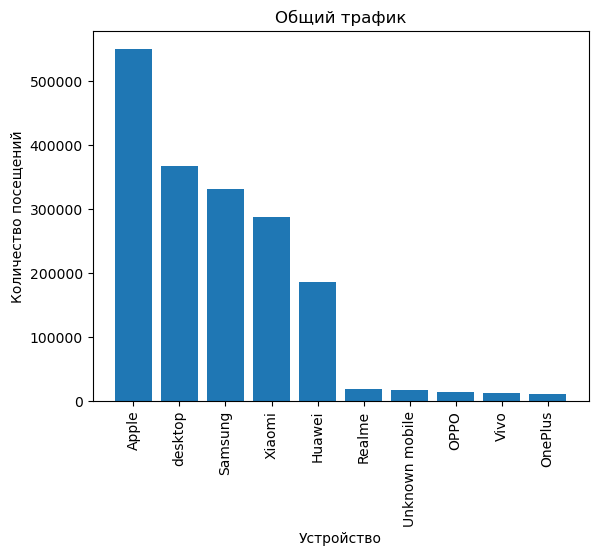

In [88]:
x = df31.index
y = df31

plt.bar(x, y)
plt.xticks(rotation='90')
plt.xlabel('Устройство')
plt.ylabel('Количество посещений')
plt.title('Общий трафик')
plt.show()

In [89]:
df32 = df_res[df_res['target_action'] == 1].device_brand.value_counts().head(10)
df32

Apple             14467
desktop           11513
Samsung           10054
Xiaomi             6592
Huawei             4519
Unknown mobile      454
Realme              421
OPPO                396
Vivo                322
Nokia               165
Name: device_brand, dtype: int64

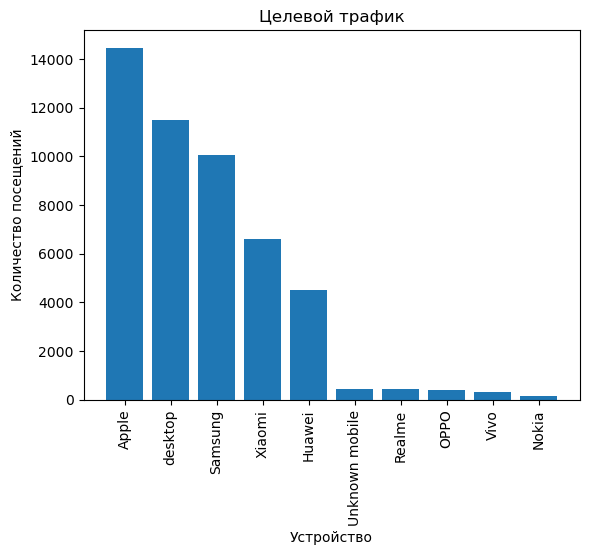

In [90]:
x = df32.index
y = df32

plt.bar(x, y)
plt.xticks(rotation='90')
plt.xlabel('Устройство')
plt.ylabel('Количество посещений')
plt.title('Целевой трафик')
plt.show()

From what regions

In [91]:
df_res.geo_city.value_counts().head(10)

Moscow              805329
Saint Petersburg    296788
(not set)            78172
Yekaterinburg        35788
Krasnodar            32243
Kazan                29531
Samara               24992
Nizhny Novgorod      22227
Ufa                  21679
Novosibirsk          21568
Name: geo_city, dtype: int64

The data contains visits in which users have hidden geodata (not set). Due to a small percentage of these visits (< 5%), and the inability to establish a location, we will not use them

In [92]:
df41 = df_res[df_res.geo_city != '(not set)'].geo_city.value_counts().head(10)
df41

Moscow              805329
Saint Petersburg    296788
Yekaterinburg        35788
Krasnodar            32243
Kazan                29531
Samara               24992
Nizhny Novgorod      22227
Ufa                  21679
Novosibirsk          21568
Krasnoyarsk          16346
Name: geo_city, dtype: int64

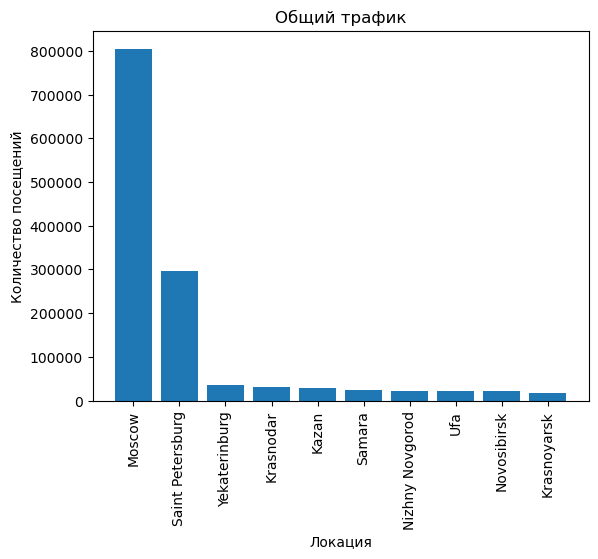

In [93]:
x = df41.index
y = df41

plt.bar(x, y)
plt.xticks(rotation='90')
plt.xlabel('Локация')
plt.ylabel('Количество посещений')
plt.title('Общий трафик')
plt.show()

In [94]:
df42 = df_res[(df_res.target_action == 1) & (df_res.geo_city != '(not set)')].geo_city.value_counts().head(10)
df42

Moscow              23629
Saint Petersburg     7113
Kazan                1139
Krasnodar            1081
Yekaterinburg         887
Samara                727
Ufa                   639
Nizhny Novgorod       559
Novosibirsk           509
Tula                  438
Name: geo_city, dtype: int64

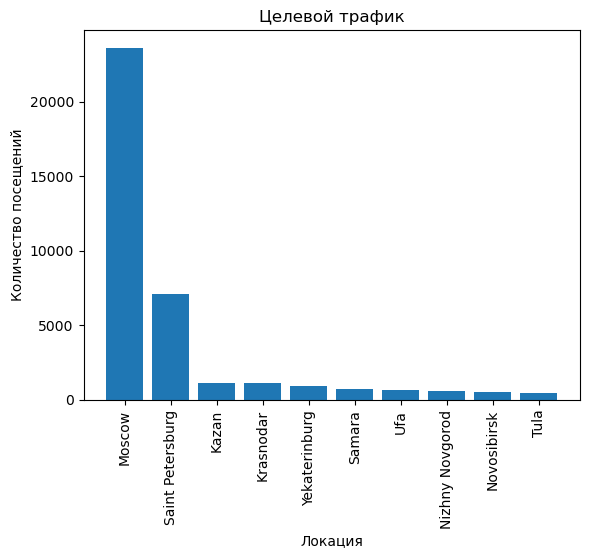

In [95]:
x = df42.index
y = df42

plt.bar(x, y)
plt.xticks(rotation='90')
plt.xlabel('Локация')
plt.ylabel('Количество посещений')
plt.title('Целевой трафик')
plt.show()

# What cars are in the greatest demand? Which cars have the best CR (Conversion Rate) in target events?

The car brand data is specified in the df dataframe, hit_page_path column. Let's analyze the data

In [96]:
df

,session_id,hit_page_path,event_action
0,5639623078712724064.1640254056.1640254056,sberauto.com/cars?utm_source_initial=google&ut...,quiz_show
1,7750352294969115059.1640271109.1640271109,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz_show
2,885342191847998240.1640235807.1640235807,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz_show
3,142526202120934167.1640211014.1640211014,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz_show
4,3450086108837475701.1640265078.1640265078,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz_show
...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz_show
15726466,7310304587364460692.1640261783.1640261783,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz_show
15726467,8013702685784312179.1640270195.1640270195,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz_show
15726468,8021505554734405918.1640257821.1640257821,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz_show


In [97]:
with pd.option_context('display.max_rows', None):
    print(df.hit_page_path.value_counts(dropna=False).head(100))

podpiska.sberauto.com/                                                                                                                                                                                                  2793639
sberauto.com/cars?city=1&rental_page=rental_only&rental_car=rental_only&city=18                                                                                                                                         1103484
sberauto.com/cars?utm_source_initial=sbol&utm_medium_initial=banner&utm_campaign_initial=LEoPHuyFvzoNfnzGgfcd&utm_content_initial=vCIpmpaGBnIQhyYNkXqp&city=1&rental_page=rental_only&rental_car=rental_only&city=18     754215
sberauto.com/cars/f28947a1?rental_page=rental_car                                                                                                                                                                        264878
sberauto.com/cars/bf24b977?rental_page=rental_car                                                       

As you can see, the car data is specified in lines containing the substring 'all'. Let's bring them out

In [98]:
df.hit_page_path[df['hit_page_path'].str.contains('all')].value_counts(dropna=False)

sberauto.com/cars/all/skoda/rapid/bf24b977?rental_page=rental_car                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                168352
sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?rental_page=rental_car                                                                                                                                                                                                                                                                                                                                            

Let's add a dictionary, the keys in which are the names of cars, the values ​​are the number

In [99]:
from collections import OrderedDict
dict_cars = {}
for i in df.hit_page_path[df['hit_page_path'].str.contains('all')]:
    try:
        y = i.split('/')[3] + '_' + i.split('/')[4]
    except:
        continue
    if y in dict_cars:
        dict_cars[y] += 1
    else:
        dict_cars[y] = 1

sorted_values = OrderedDict(sorted(dict_cars.items(), key=lambda x: -x[1]))
cars_model = list(sorted_values)[:10]
cars_count = list(sorted_values.values())[:10]
print(cars_count)

[442513, 403910, 318075, 194273, 178467, 153153, 90249, 85548, 77005, 76676]


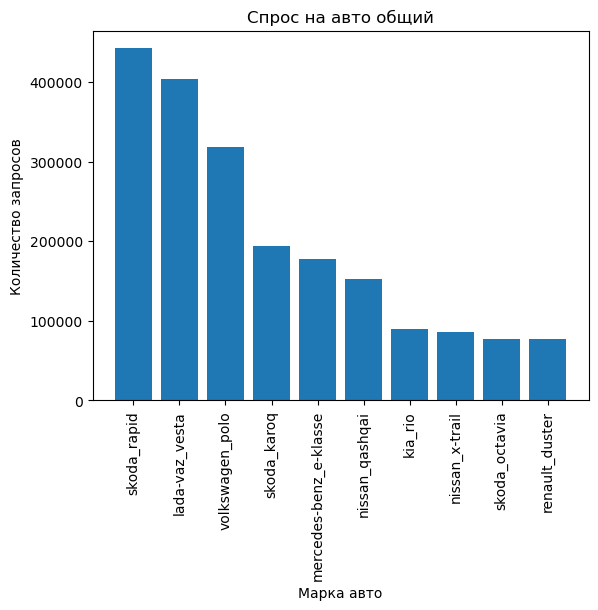

In [100]:
x = cars_model
y = cars_count

plt.bar(x, y)
plt.xticks(rotation='90')
plt.xlabel('Марка авто')
plt.ylabel('Количество запросов')
plt.title('Спрос на авто общий')
plt.show()

In [101]:
dict_cars1 = {}
for i in df_ta.hit_page_path[df_ta['hit_page_path'].str.contains('all')]:
    try:
        y = i.split('/')[3] + '_' + i.split('/')[4]
    except:
        continue
    if y in dict_cars1:
        dict_cars1[y] += 1
    else:
        dict_cars1[y] = 1

sorted_values1 = OrderedDict(sorted(dict_cars1.items(), key=lambda x: -x[1]))
cars_model1 = list(sorted_values1)[:10]
cars_count1 = list(sorted_values1.values())[:10]
print(cars_count1)

[6030, 5356, 4634, 1438, 1305, 1245, 1145, 893, 891, 848]


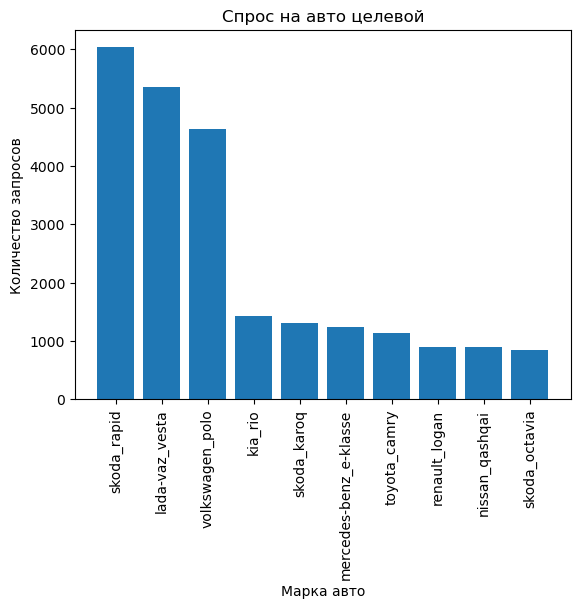

In [102]:
x = cars_model1
y = cars_count1

plt.bar(x, y)
plt.xticks(rotation='90')
plt.xlabel('Марка авто')
plt.ylabel('Количество запросов')
plt.title('Спрос на авто целевой')
plt.show()

# Should we increase our presence on social networks and give more advertising there?

In [103]:
socnets = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo',
           'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']
df_socnet = df_res.loc[df_res['utm_source'].isin(socnets)]
df_socnet

,session_id,visit_date,utm_source,utm_medium,utm_campaign,device_category,device_brand,geo_city,target_action
1.0,905544597018549464.1636867290.1636867290,2021-11-14 00:00:00+00:00,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Samsung,Moscow,0
13.0,9055469620715506713.1635878177.1635878177,2021-11-02 00:00:00+00:00,gVRrcxiDQubJiljoTbGm,referral,LTuZkdKfxRGVceoWkVyg,mobile,Samsung,Sochi,0
21.0,9055497958914887309.1634045644.1634045644,2021-10-12 00:00:00+00:00,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Xiaomi,Moscow,0
22.0,9055497958914887309.1634046980.1634046980,2021-10-12 00:00:00+00:00,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Xiaomi,Moscow,0
23.0,9055497958914887309.1634048072.1634048072,2021-10-12 00:00:00+00:00,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Xiaomi,Moscow,0
...,...,...,...,...,...,...,...,...,...
1860024.0,9055349030922605117.1632752193.1632752193,2021-09-27 00:00:00+00:00,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,BQ,Saint Petersburg,0
1860027.0,9055363711117247375.1629176721.1629176721,2021-08-17 00:00:00+00:00,PlbkrSYoHuZBWfYjYnfw,cpm,FTjNLDyTrXaWYgZymFkV,desktop,desktop,(not set),0
1860028.0,9055373598132450813.1629664766.1629664766,2021-08-22 00:00:00+00:00,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Xiaomi,Saint Petersburg,0
1860030.0,9055382948278467242.1631877802.1631877802,2021-09-17 00:00:00+00:00,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Xiaomi,Saint Petersburg,0


As you can see, the use of social networks and advertising in them brings us 15 (274227/1809728*100) percent of the total traffic. Let's check the conversion to CR

In [104]:
df_socnet[df_socnet['target_action'] == 1]

,session_id,visit_date,utm_source,utm_medium,utm_campaign,device_category,device_brand,geo_city,target_action
536.0,9057763871993795611.1636733983.1636733983,2021-11-12 00:00:00+00:00,QxAxdyPLuQMEcrdZWdWb,cpc,emlBaVkgLVRqbEVOSSXt,mobile,Xiaomi,Moscow,1
584.0,9057918495115047515.1640362594.1640362594,2021-12-24 00:00:00+00:00,QxAxdyPLuQMEcrdZWdWb,cpa,mSVMBvlHFgftJaQAZEdp,mobile,Xiaomi,Samara,1
1488.0,9062302308102446107.1638276127.1638276127,2021-11-30 00:00:00+00:00,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,OPPO,Moscow,1
1864.0,9063952327154256858.1635013448.1635013448,2021-10-23 00:00:00+00:00,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Realme,Saint Petersburg,1
2210.0,9065244489549596945.1638682723.1638682723,2021-12-05 00:00:00+00:00,QxAxdyPLuQMEcrdZWdWb,cpc,No_campaign,mobile,Samsung,Moscow,1
...,...,...,...,...,...,...,...,...,...
1857479.0,9044212481378180028.1639144380.1639144380,2021-12-10 00:00:00+00:00,QxAxdyPLuQMEcrdZWdWb,cpc,No_campaign,mobile,Apple,Moscow,1
1857501.0,9044324751821084197.1636931108.1636931108,2021-11-15 00:00:00+00:00,QxAxdyPLuQMEcrdZWdWb,cpc,emlBaVkgLVRqbEVOSSXt,mobile,Samsung,Moscow,1
1858651.0,9049492048448619382.1636416370.1636416370,2021-11-09 00:00:00+00:00,QxAxdyPLuQMEcrdZWdWb,cpc,vNNYHvZtTVtJICHsjBBL,mobile,Samsung,Moscow,1
1858709.0,9049768223430102786.1630228226.1630228226,2021-08-29 00:00:00+00:00,QxAxdyPLuQMEcrdZWdWb,cpm,WJUKqfeOrjXIOHjgcgdR,mobile,Apple,Moscow,1


In [105]:
df_res.target_action.value_counts()

0    1809728
1      50314
Name: target_action, dtype: int64

Total conversion into targeted actions 2.8 percent (50314/1809728*100)

In [106]:
df_socnet.target_action.value_counts()

0    270206
1      4021
Name: target_action, dtype: int64

The conversion into targeted actions for clicks from social networks is much lower, 1.49 percent (4021/270206*100). Compare with paid traffic

In [107]:
df_norg['target_action'].value_counts()

0    1314881
1      29502
Name: target_action, dtype: int64

Conversion to targeted actions for all paid traffic 2.24 percent (29502/1314881*100)

Thus, it can be stated that the use of advertising in social networks is a suboptimal means of attracting target customers compared to other paid resources, provided that the cost ratio is equal

# Conclusions:

## 1. Despite some increase in the total number of visits to the site, there is no increase in the number of targeted actions. Possible reasons:
Advertising on resources with non-target audience;
User dissatisfaction with the offered conditions, cost, cars available

## 2. The main range of customer requests falls on low-budget cars. At the same time, the number of requests for a middle-class car sags significantly. A possible solution is to focus on middle-class cars, providing preferences to such customers

## 3. The number of target customers depends on the availability / absence of the possibility of a quick car. Probably, the opening of an additional Privolzhsko-Uralsky office, with the service of large cities of Kazan, Samara, Yekaterinburg, etc. will lead to an increase in the use of the service by customers from these points